In [1]:
from sympy import *
from sympy.abc import x, y, z
import numpy as np
import matplotlib.pyplot as plt
%run my_functions.ipynb

In [2]:
X = Symbol ('X')  #hx
D = Symbol ('D')  #d
Z = Symbol ('Z')  #hz
Y = Symbol ('Y')

In [3]:
I = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

sx2 = np.kron(np.kron(I,sx),I)
sz2 = np.kron(np.kron(I,sz),I)

sx_ab = np.kron(np.kron(sx,I),sx)
sy_ab = np.kron(np.kron(sy,I),sy)
sz_ab = np.kron(np.kron(sz,I),sz)

sx_ac = np.kron(np.kron(sx,sx),I)
sy_ac = np.kron(np.kron(sy,sy),I)
sz_ac = np.kron(np.kron(sz,sz),I)

sx_bc = np.kron(np.kron(I,sx),sx)
sy_bc = np.kron(np.kron(I,sy),sy)
sz_bc = np.kron(np.kron(I,sz),sz)

In [4]:
H_c = 1j*Z*sz2 + X*sx2
H_ab = sx_ab + sy_ab + D*sz_ab
H_bc = sx_bc + sy_bc + D*sz_bc
H_ac = sx_ac + sy_ac + D*sz_ac
H_t = H_c + H_ab + H_bc + H_ac
H = Matrix(H_t)
H

Matrix([
[3*D + 1.0*I*Z,            0,            X,            0,            0,            0,            0,             0],
[            0, -D + 1.0*I*Z,          2.0,            X,          2.0,            0,            0,             0],
[            X,          2.0, -D - 1.0*I*Z,            0,          2.0,            0,            0,             0],
[            0,            X,            0, -D - 1.0*I*Z,            0,          2.0,          2.0,             0],
[            0,          2.0,          2.0,            0, -D + 1.0*I*Z,            0,            X,             0],
[            0,            0,            0,          2.0,            0, -D + 1.0*I*Z,          2.0,             X],
[            0,            0,            0,          2.0,            X,          2.0, -D - 1.0*I*Z,             0],
[            0,            0,            0,            0,            0,            X,            0, 3*D - 1.0*I*Z]])

In [5]:
char_poly = simplify(H.charpoly(y))
char_poly

PurePoly(1.0*y**8 + (-12.0*D**2 - 4.0*X**2 + 4.0*Z**2 - 24.0)*y**6 + (-16.0*D**3 + 48.0*D - 32.0)*y**5 + (30.0*D**4 + 28.0*D**2*X**2 - 12.0*D**2*Z**2 + 216.0*D**2 + 96.0*D + 6.0*X**4 - 12.0*X**2*Z**2 + 40.0*X**2 + 6.0*Z**4 - 56.0*Z**2 + 144.0)*y**4 + (96.0*D**5 + 32.0*D**3*X**2 + 32.0*D**3*Z**2 - 96.0*D**3 + 192.0*D**2 - 32.0*D*X**2 + 32.0*D*Z**2 - 576.0*D - 64.0*Z**2 + 384.0)*y**3 + (100.0*D**6 - 12.0*D**4*X**2 + 108.0*D**4*Z**2 - 744.0*D**4 - 320.0*D**3 - 20.0*D**2*X**4 + 8.0*D**2*X**2*Z**2 - 208.0*D**2*X**2 + 12.0*D**2*Z**4 - 80.0*D**2*Z**2 - 288.0*D**2 + 128.0*D*X**2 + 64.0*D*Z**2 - 1920.0*D - 4.0*X**6 + 12.0*X**4*Z**2 - 8.0*X**4 - 12.0*X**2*Z**4 + 48.0*X**2*Z**2 - 160.0*X**2 + 4.0*Z**6 - 40.0*Z**4 + 160.0*Z**2 + 256.0)*y**2 + (48.0*D**7 - 32.0*D**5*X**2 + 96.0*D**5*Z**2 - 720.0*D**5 - 672.0*D**4 - 16.0*D**3*X**4 - 32.0*D**3*X**2*Z**2 - 160.0*D**3*X**2 + 48.0*D**3*Z**4 - 480.0*D**3*Z**2 + 1728.0*D**3 - 256.0*D**2*X**2 - 192.0*D**2*Z**2 + 1152.0*D**2 - 16.0*D*X**4 + 32.0*D*X**2*Z**2

In [6]:
solve(char_poly,y,set=True)

([y], {(-D + sqrt(X**2 - Z**2) - 2.0,), (-D - sqrt(X**2 - Z**2) - 2.0,)})

In [7]:
roots(char_poly,y)

{-1.0*D - 1.0*sqrt(X**2 - Z**2) - 2.0: 1,
 -1.0*D + 1.0*sqrt(X**2 - Z**2) - 2.0: 1}

In [57]:
solve(H1.charpoly(x='k'),'k',set=True)

([k], {(-1.00000000000000,)})

## Checking if hamiltonian is PT symmetric

In [5]:
hx = [0.8]*500
hz = np.linspace(0,hx[0],num=500,endpoint=False)    #Case 1: hz<hx
#hz2 = np.linspace(hx[0]-0.01,hx[0],num=500,endpoint=False) #Case 2: hz~hx
d = np.linspace(0,1,500)

In [6]:
for i in range(len(hz)):
    H_c = 1j*hz[i]*sz2 + hx[i]*sx2
    H_ab = sx_ab + sy_ab + d[i]*sz_ab
    H_bc = sx_bc + sy_bc + d[i]*sz_bc
    H_ac = sx_ac + sy_ac + d[i]*sz_ac
    H_t = H_c + H_ab + H_bc + H_ac

In [7]:
parity = np.array([[0,1],[1,0]]).reshape(2,2)
P = np.kron(parity,np.kron(parity,parity))
np.conj(H_t@P)

array([[ 0. -0.j    ,  0. -0.j    ,  0. -0.j    ,  0. -0.j    ,
         0. -0.j    ,  0.8-0.j    ,  0. -0.j    ,  3. -0.7984j],
       [ 0. -0.j    ,  0. -0.j    ,  0. -0.j    ,  2. -0.j    ,
         0.8-0.j    ,  2. -0.j    , -1. -0.7984j,  0. -0.j    ],
       [ 0. -0.j    ,  0. -0.j    ,  0. -0.j    ,  2. -0.j    ,
         0. -0.j    , -1. +0.7984j,  2. -0.j    ,  0.8-0.j    ],
       [ 0. -0.j    ,  2. -0.j    ,  2. -0.j    ,  0. -0.j    ,
        -1. +0.7984j,  0. -0.j    ,  0.8-0.j    ,  0. -0.j    ],
       [ 0. -0.j    ,  0.8-0.j    ,  0. -0.j    , -1. -0.7984j,
         0. -0.j    ,  2. -0.j    ,  2. -0.j    ,  0. -0.j    ],
       [ 0.8-0.j    ,  2. -0.j    , -1. -0.7984j,  0. -0.j    ,
         2. -0.j    ,  0. -0.j    ,  0. -0.j    ,  0. -0.j    ],
       [ 0. -0.j    , -1. +0.7984j,  2. -0.j    ,  0.8-0.j    ,
         2. -0.j    ,  0. -0.j    ,  0. -0.j    ,  0. -0.j    ],
       [ 3. +0.7984j,  0. -0.j    ,  0.8-0.j    ,  0. -0.j    ,
         0. -0.j    ,  0. -0.j   

In [8]:
np.conj(H_t)@P

array([[ 0. +0.j    ,  0. +0.j    ,  0. +0.j    ,  0. +0.j    ,
         0. +0.j    ,  0.8+0.j    ,  0. +0.j    ,  3. -0.7984j],
       [ 0. +0.j    ,  0. +0.j    ,  0. +0.j    ,  2. +0.j    ,
         0.8+0.j    ,  2. +0.j    , -1. -0.7984j,  0. +0.j    ],
       [ 0. +0.j    ,  0. +0.j    ,  0. +0.j    ,  2. +0.j    ,
         0. +0.j    , -1. +0.7984j,  2. +0.j    ,  0.8+0.j    ],
       [ 0. +0.j    ,  2. +0.j    ,  2. +0.j    ,  0. +0.j    ,
        -1. +0.7984j,  0. +0.j    ,  0.8+0.j    ,  0. +0.j    ],
       [ 0. +0.j    ,  0.8+0.j    ,  0. +0.j    , -1. -0.7984j,
         0. +0.j    ,  2. +0.j    ,  2. +0.j    ,  0. +0.j    ],
       [ 0.8+0.j    ,  2. +0.j    , -1. -0.7984j,  0. +0.j    ,
         2. +0.j    ,  0. +0.j    ,  0. +0.j    ,  0. +0.j    ],
       [ 0. +0.j    , -1. +0.7984j,  2. +0.j    ,  0.8+0.j    ,
         2. +0.j    ,  0. +0.j    ,  0. +0.j    ,  0. +0.j    ],
       [ 3. +0.7984j,  0. +0.j    ,  0.8+0.j    ,  0. +0.j    ,
         0. +0.j    ,  0. +0.j   

In [9]:
np.conj(H_t@P) == np.conj(H_t)@P

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

## Exceptional Points

### H_c

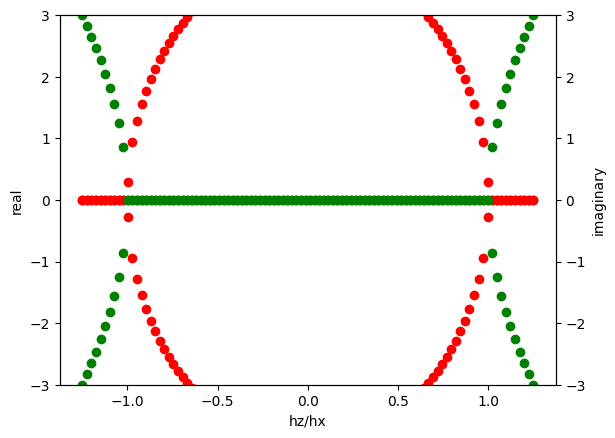

In [22]:
hz = np.linspace(-5,5,100,True)
hx = [4]*100
#D = [-1]*100
hzhx = []
lmbda_real = []
lmbda_im = []
for i in range(len(hx)):
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
# print(np.shape(hzhx))
    H_c = 1j*hz[i]*sz + hx[i]*sx
    lmbda = np.linalg.eigvals(H_c)
    for k in range(len(lmbda)):
        lmbda_real.append(lmbda.real[k])
        lmbda_im.append(lmbda.imag[k])
    #print(np.shape(lmbda_real))
fig,ax = plt.subplots()
ax.scatter(hzhx,lmbda_real,color='r')
ax.set_xlabel('hz/hx')
ax.set_ylabel('real')
plt.ylim(-3,3)
ax2 = ax.twinx()
ax2.scatter(hzhx,lmbda_im,color='g')
ax2.set_ylabel('imaginary')
plt.ylim(-3,3)
plt.show()


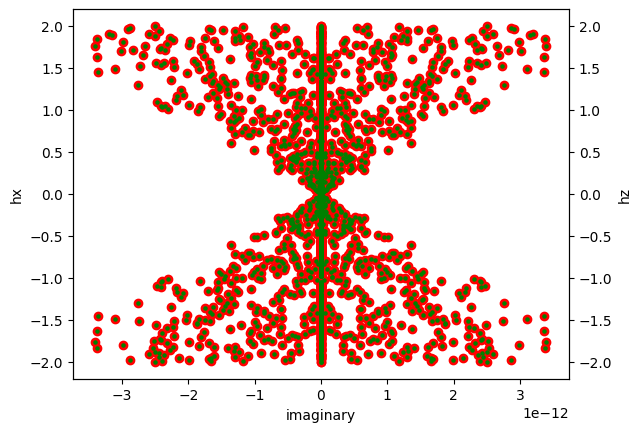

In [19]:
hz = np.linspace(-2,2,1000,True)
hx = np.linspace(-2,2,1000,True)
hz_plot = []
hx_plot = []
#D = [-1]*100
#hzhx = []
lmbda_real = []
lmbda_im = []
for i in range(len(hx)):
    hz_plot.append(hz[i])
    hz_plot.append(hz[i])
    hx_plot.append(hx[i])
    hx_plot.append(hx[i])
# print(np.shape(hzhx))
    H_c = 1j*hz[i]*sz + hx[i]*sx
    lmbda = np.linalg.eigvals(H_c)
    for k in range(len(lmbda)):
        lmbda_real.append(lmbda.real[k])
        lmbda_im.append(lmbda.imag[k])
    #print(np.shape(lmbda_real))
fig,ax = plt.subplots()
ax.scatter(lmbda_im,hx_plot,color='r')
ax.set_xlabel('imaginary')
ax.set_ylabel('hx')
#plt.ylim(-3,3)
ax2 = ax.twinx()
ax2.scatter(lmbda_im,hz_plot,s=5,color='g')
ax2.set_ylabel('hz')
#plt.ylim(-3,3)
plt.show()

[ 0.000e+00 -0.000e+00 -8.462e-01 ...  1.000e-04 -0.000e+00  0.000e+00]


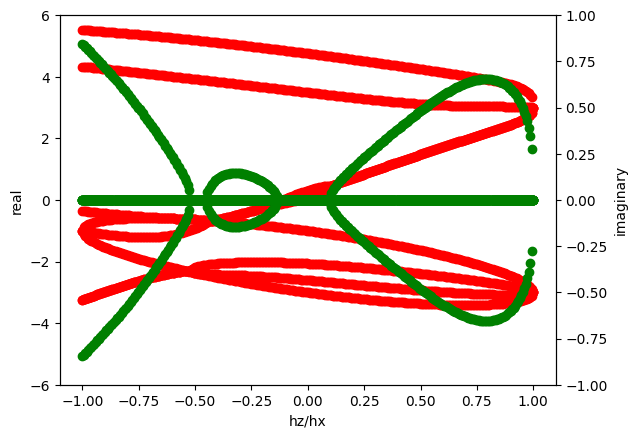

In [11]:
hz = np.linspace(-1,1,300,True)
hx = [1]*300
D = np.linspace(-1,1,300,True)
hzhx = []
lmbda_real = []
lmbda_im = []
for i in range(len(hx)):
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
    hzhx.append(hz[i]/hx[i])
# print(np.shape(hzhx))
    H_c = 1j*hz[i]*sz2 + hx[i]*sx2
    H_ab = sx_ab + sy_ab + D[i]*sz_ab
    H_bc = sx_bc + sy_bc + D[i]*sz_bc
    H_ac = sx_ac + sy_ac + D[i]*sz_ac
    H_t = H_c + H_ab + H_bc + H_ac
    lmbda = np.linalg.eigvals(H_t)
    for k in range(len(lmbda)):
        lmbda_real.append(lmbda.real[k])
        lmbda_im.append(lmbda.imag[k])
        np.shape(lmbda.real)
print(np.round(lmbda_im,4))
fig,ax = plt.subplots()
ax.scatter(hzhx,lmbda_real,color='r')
ax.set_xlabel('hz/hx')
ax.set_ylabel('real')
plt.ylim(-6,6)
ax2 = ax.twinx()
ax2.scatter(hzhx,lmbda_im,color='g')
ax2.set_ylabel('imaginary')
plt.ylim(-1,1)
plt.show()


### hx , D vs lambda_im

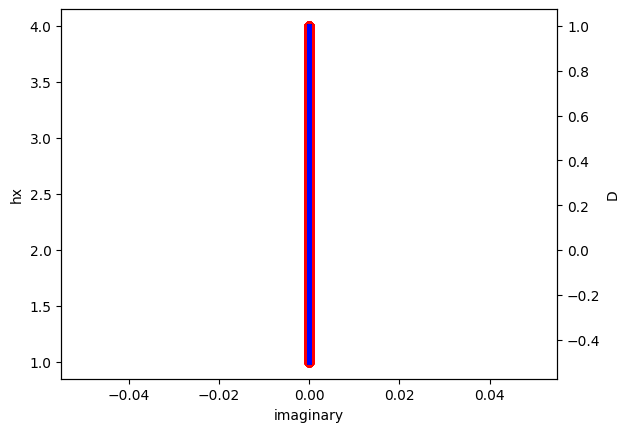

In [20]:
hz = [0.3]*10000
hx = np.linspace(1,4,10000,True)
D = np.linspace(-0.5,1,10000,True)
Dhx = []
hzhx = []
hx_plot = []
D_plot = []
lmbda_real = []
lmbda_im = []
for i in range(len(hx)):
    j = 8
    while j!=0:
        Dhx.append(D[i]/hx[i])
        hzhx.append(hz[i]/hx[i])
        hx_plot.append(hx[i])
        D_plot.append(D[i])
        j-=1  
#print(np.shape(hzhx))
    H_c = 1j*hz[i]*sz2 + hx[i]*sx2
    H_ab = sx_ab + sy_ab + D[i]*sz_ab
    H_bc = sx_bc + sy_bc + D[i]*sz_bc
    H_ac = sx_ac + sy_ac + D[i]*sz_ac
    H_t = H_c + H_ab + H_bc + H_ac
    lmbda = np.linalg.eigvals(H_t)
    for k in range(len(lmbda)):
        lmbda_real.append(lmbda.real[k])
        lmbda_im.append(lmbda.imag[k])
        np.shape(lmbda.real)
#print(np.round(lmbda_im,4))
fig,ax = plt.subplots()
ax.scatter(np.round(lmbda_im,5),hx_plot,color='r')
ax.set_xlabel('imaginary')
ax.set_ylabel('hx')
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.06,0.052)
ax2 = ax.twinx()
ax2.scatter(np.round(lmbda_im,5),D_plot,s=5,color='b',marker='o')
ax2.set_ylabel('D')
#plt.ylim(-1,1.5)
plt.show()

In [28]:
a = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for k in range(len(a)):
    hz = [a[k]]*10000
    hx = np.linspace(0,4,10000,True)
    D = np.linspace(-1,1,10000,True)
    hx_plot = []
    D_plot = []
    lmbda_real = []
    lmbda_im = []
    for i in range(len(hx)):
        j = 8
        while j!=0:
            hx_plot.append(hx[i])
            D_plot.append(D[i])
            j-=1  
    #print(np.shape(hzhx))
        H_c = 1j*hz[i]*sz2 + hx[i]*sx2
        H_ab = sx_ab + sy_ab + D[i]*sz_ab
        H_bc = sx_bc + sy_bc + D[i]*sz_bc
        H_ac = sx_ac + sy_ac + D[i]*sz_ac
        H_t = H_c + H_ab + H_bc + H_ac
        lmbda = np.linalg.eigvals(H_t)
        for k in range(len(lmbda)):
            lmbda_real.append(lmbda.real[k])
            lmbda_im.append(lmbda.imag[k])
            np.shape(lmbda.real)
    #print(np.round(lmbda_im,4))
#     plt.subplot(2, 1, 1) # row 1, col 2 index 1
#     plt.scatter(D_plot, lmbda_im, color = 'r')
#     plt.title('For hz = {}; D vs imaginary'.format(hz[k]))
#     plt.xlabel('Delta (D)')
#     plt.ylabel('imaginary')

#     plt.subplot(2, 1, 2) # index 2
#     plt.scatter(hx_plot, lmbda_im, color = 'g')
#     plt.title("hx vs imaginary")
#     plt.xlabel('hx')
#     plt.ylabel('imaginary')

#     plt.subplots_adjust(hspace=0.5,wspace=2)
    #plt.show()

In [14]:
## In above graph, not only hx>hz condition is satisfied but also hx>hz+1 (approximately).
## The above graph can be plotted for any value of hz (degree of non-hermiticity) and same kinda plot is observed

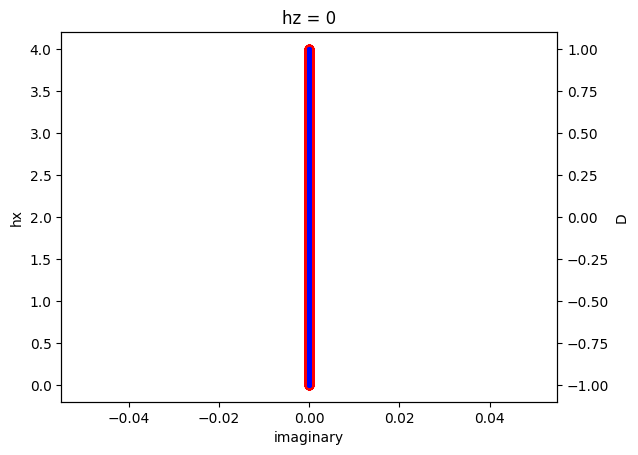

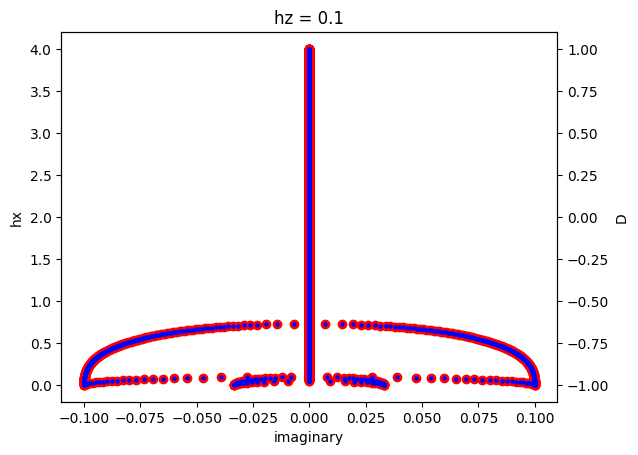

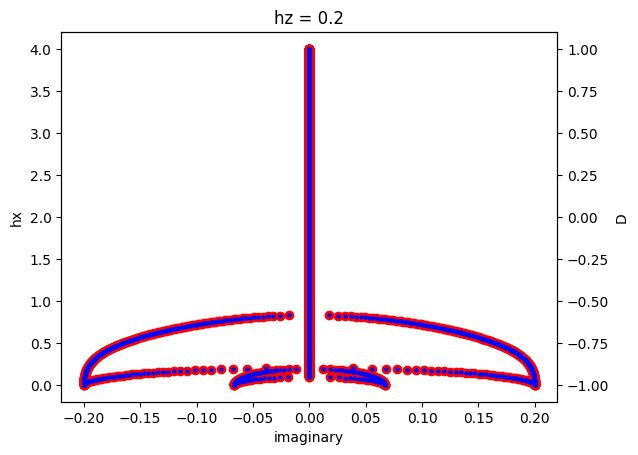

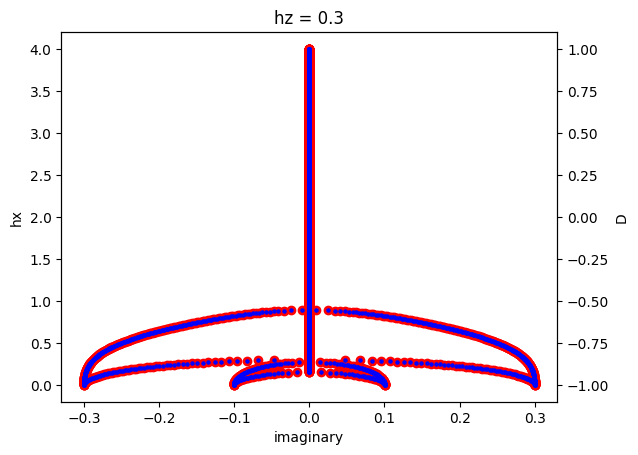

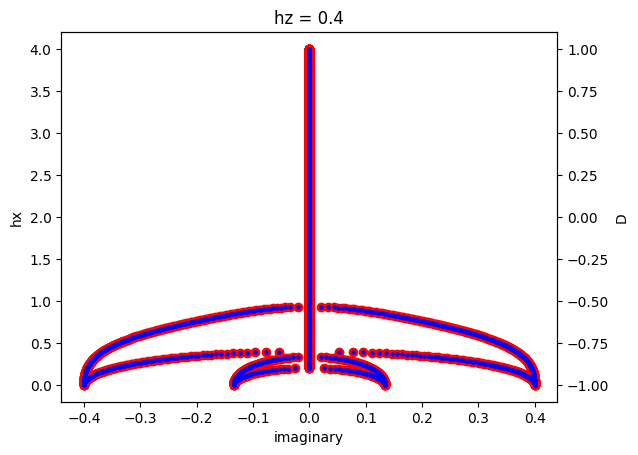

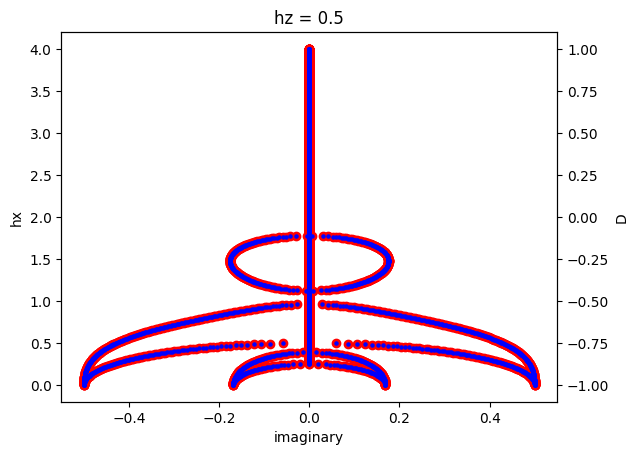

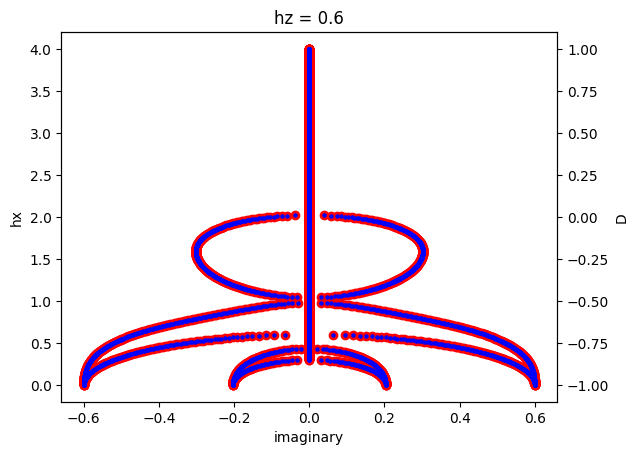

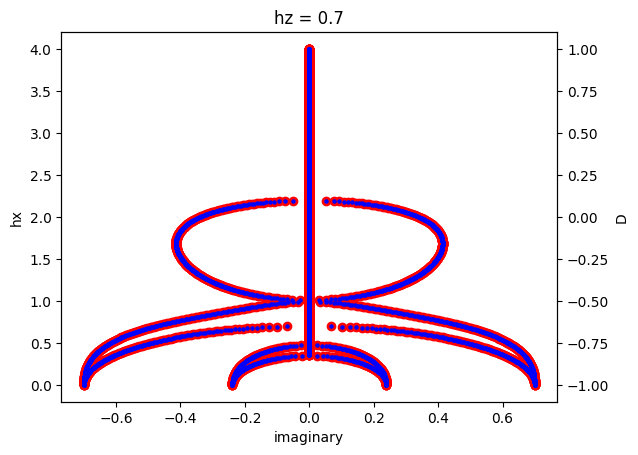

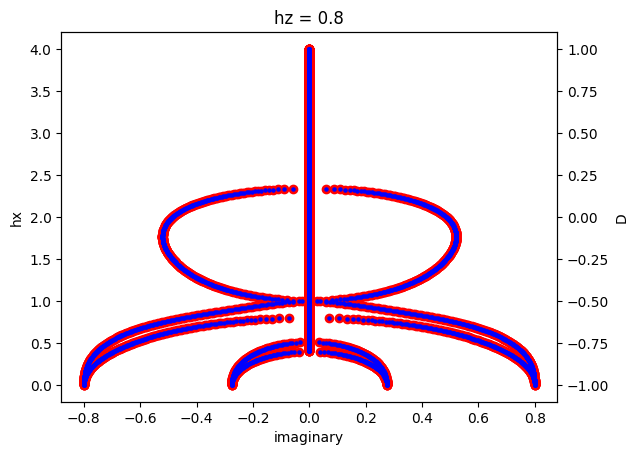

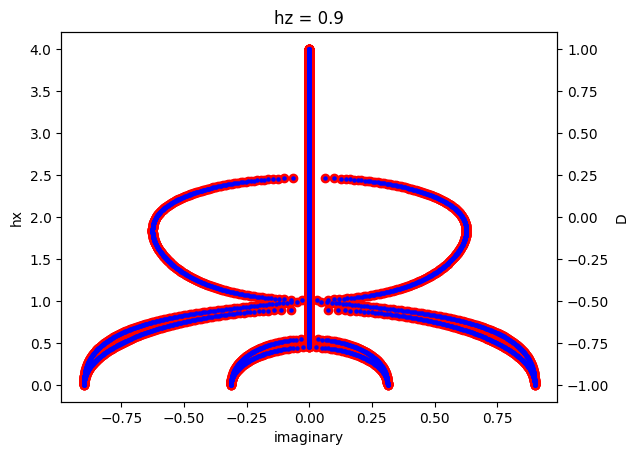

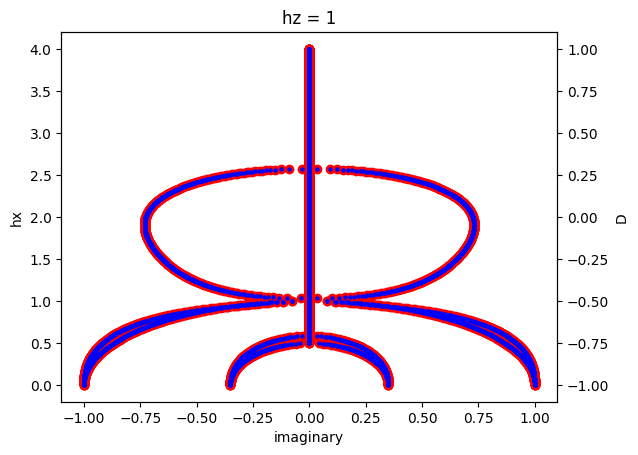

In [33]:
a = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for k in range(len(a)):
    hz = [a[k]]*1000
    hx = np.linspace(0,4,1000,True)
    D = np.linspace(-1,1,1000,True)
    #Dhx = []
    #hxD = []
    hx_plot = []
    D_plot = []
    lmbda_real = []
    lmbda_im = []
    for i in range(len(hx)):
        j = 8
        while j!=0:
            #Dhx.append(D[i]/hx[i])
            #hxD.append(hx[i]*D[i])
            hx_plot.append(hx[i])
            D_plot.append(D[i])
            j-=1  
    #print(np.shape(hzhx))
        H_c = 1j*hz[i]*sz2 + hx[i]*sx2
        H_ab = sx_ab + sy_ab + D[i]*sz_ab
        H_bc = sx_bc + sy_bc + D[i]*sz_bc
        H_ac = sx_ac + sy_ac + D[i]*sz_ac
        H_t = H_c + H_ab + H_bc + H_ac
        lmbda = np.linalg.eigvals(H_t)
        for k in range(len(lmbda)):
            lmbda_real.append(lmbda.real[k])
            lmbda_im.append(lmbda.imag[k])
            np.shape(lmbda.real)
    #print(np.round(hzD,4))
    fig,ax = plt.subplots()
    ax.scatter(np.round(lmbda_im,5),hx_plot,color='r')
    ax.set_xlabel('imaginary')
    ax.set_ylabel('hx')
    plt.title('hz = {}'.format(hz[k]))
    #plt.xlim(-0.1,0.1)
    #plt.ylim(-0.06,0.052)
    ax2 = ax.twinx()
    ax2.scatter(np.round(lmbda_im,5),D_plot,s=5,color='b',marker='o')
    ax2.set_ylabel('D')
    #plt.ylim(-1,1.5)
    plt.show()

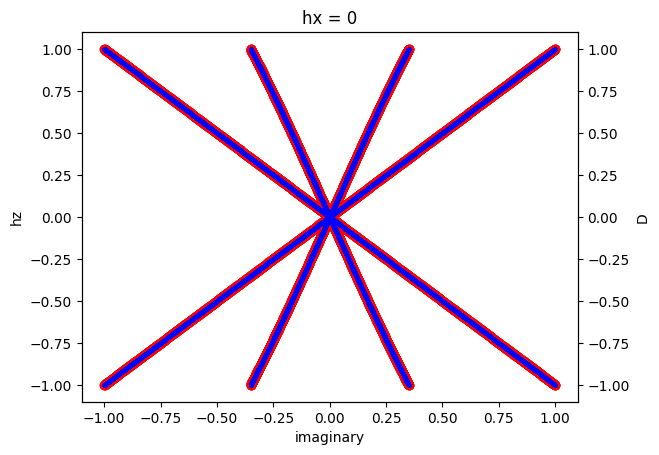

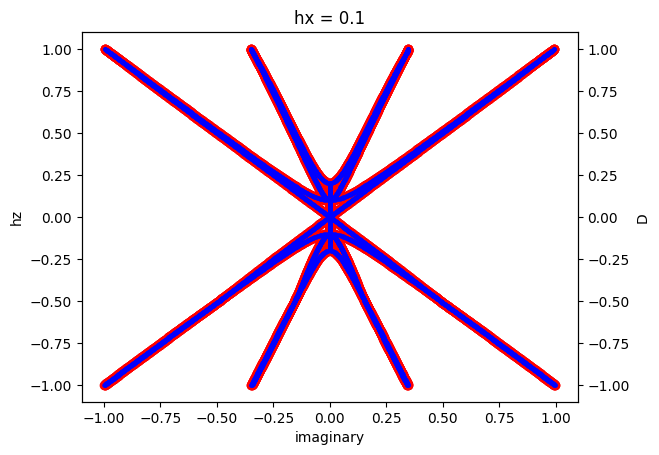

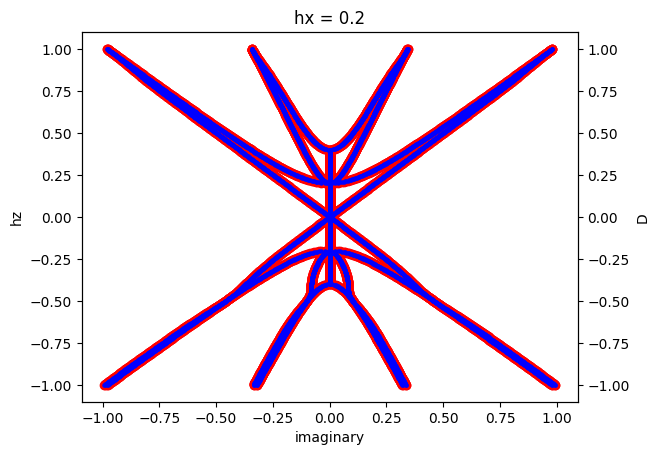

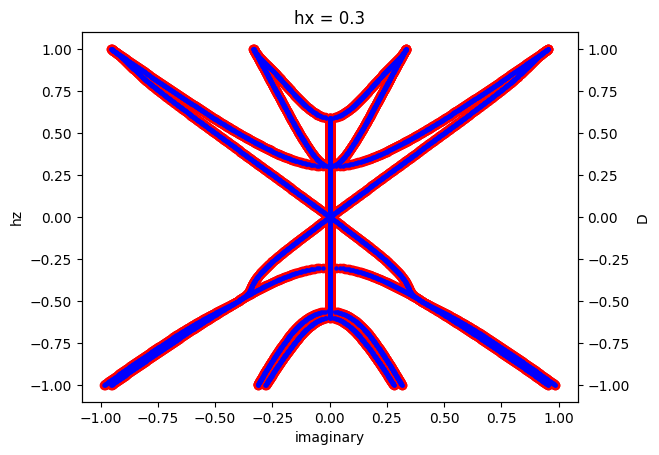

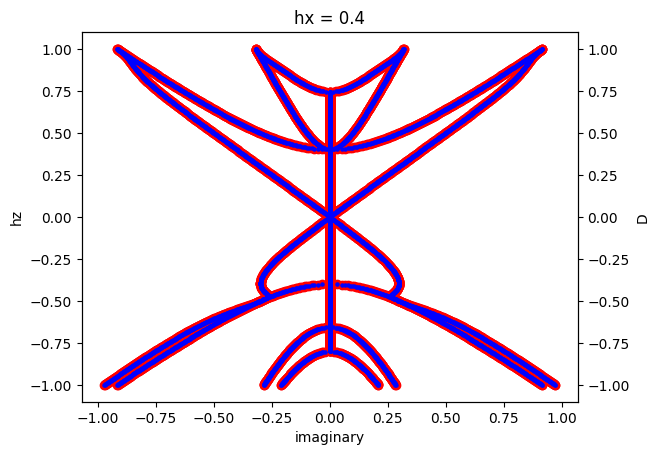

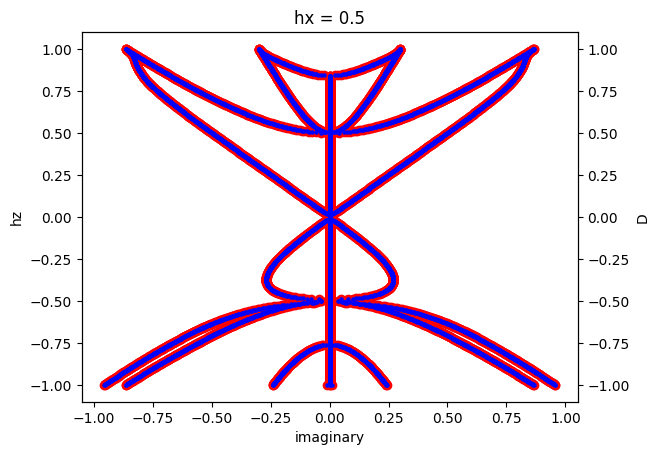

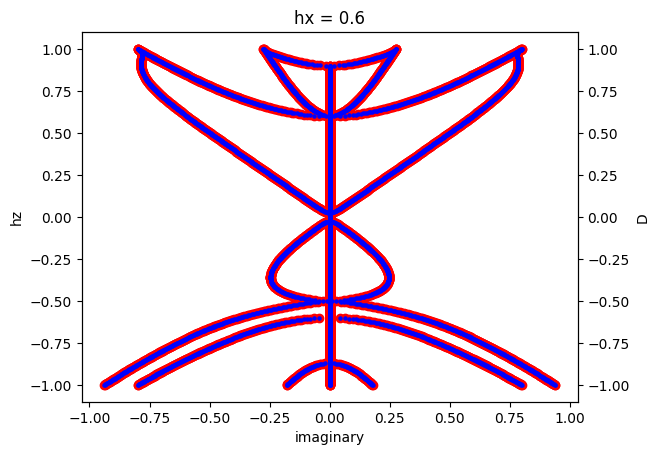

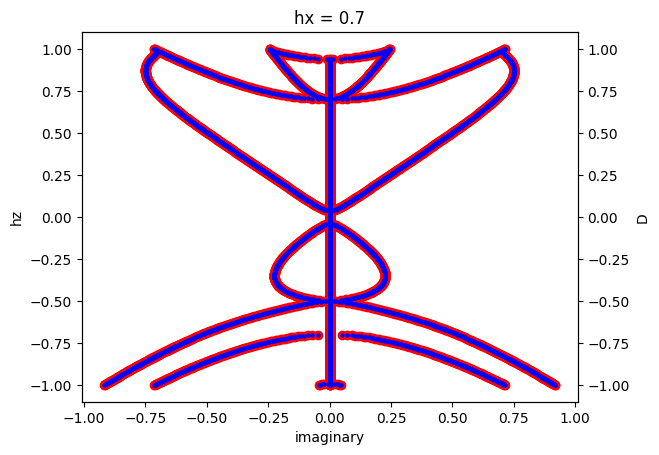

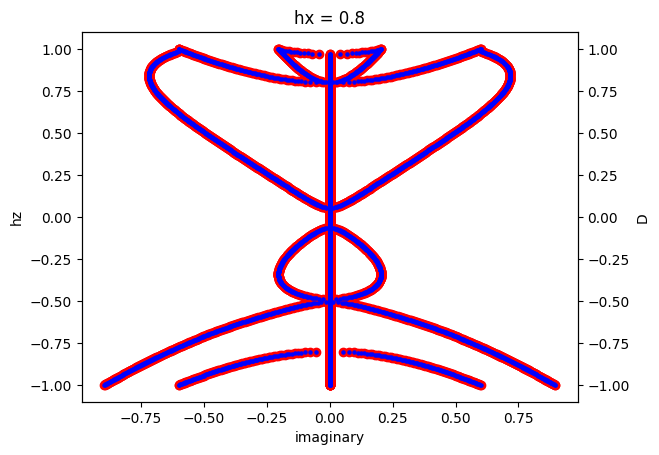

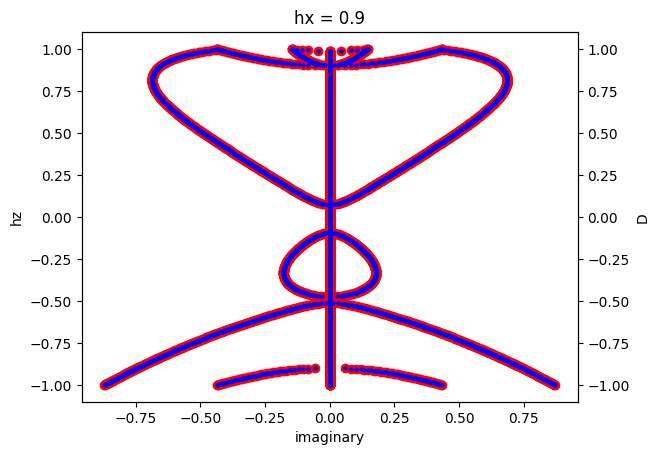

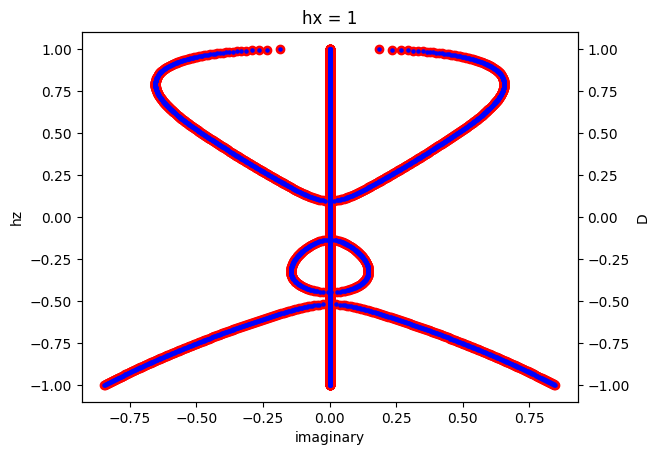

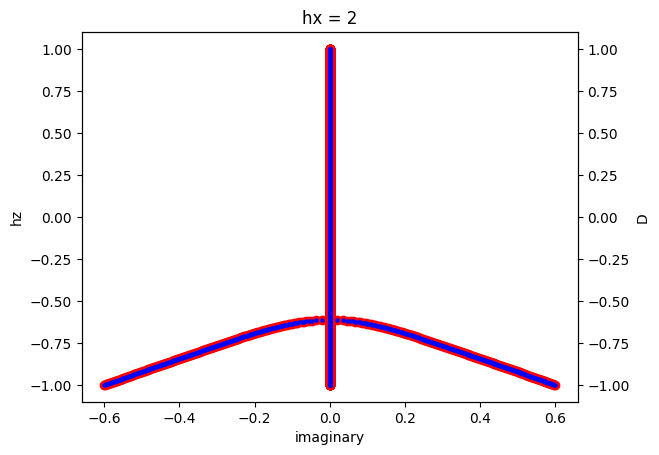

In [37]:
a = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2]
for k in range(len(a)):
    hx = [a[k]]*1000
    hz = np.linspace(-1,1,1000,True)
    D = np.linspace(-1,1,1000,True)
    #Dhx = []
    #hxD = []
    hz_plot = []
    D_plot = []
    lmbda_real = []
    lmbda_im = []
    for i in range(len(hx)):
        j = 8
        while j!=0:
            #Dhx.append(D[i]/hx[i])
            #hxD.append(hx[i]*D[i])
            hz_plot.append(hz[i])
            D_plot.append(D[i])
            j-=1  
    #print(np.shape(hzhx))
        H_c = 1j*hz[i]*sz2 + hx[i]*sx2
        H_ab = sx_ab + sy_ab + D[i]*sz_ab
        H_bc = sx_bc + sy_bc + D[i]*sz_bc
        H_ac = sx_ac + sy_ac + D[i]*sz_ac
        H_t = H_c + H_ab + H_bc + H_ac
        lmbda = np.linalg.eigvals(H_t)
        for k in range(len(lmbda)):
            lmbda_real.append(lmbda.real[k])
            lmbda_im.append(lmbda.imag[k])
            np.shape(lmbda.real)
    #print(np.round(hzD,4))
    fig,ax = plt.subplots()
    ax.scatter(np.round(lmbda_im,5),hz_plot,color='r')
    ax.set_xlabel('imaginary')
    ax.set_ylabel('hz')
    plt.title('hx = {}'.format(hx[k]))
    #plt.xlim(-0.1,0.1)
    #plt.ylim(-0.06,0.052)
    ax2 = ax.twinx()
    ax2.scatter(np.round(lmbda_im,5),D_plot,s=5,color='b',marker='o')
    ax2.set_ylabel('D')
    #plt.ylim(-1,1.5)
    plt.show()

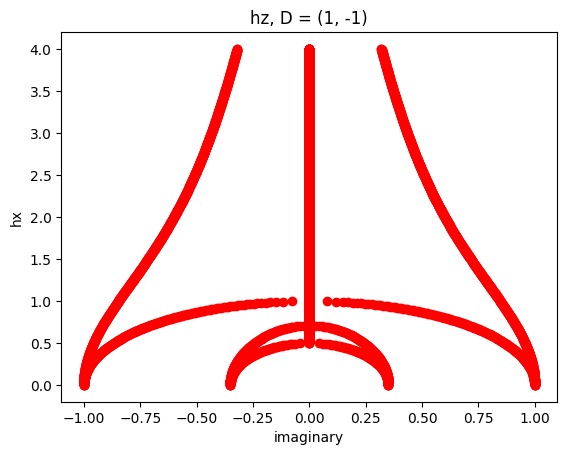

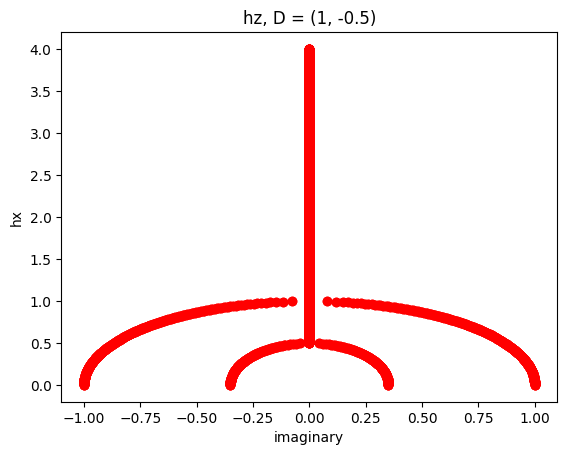

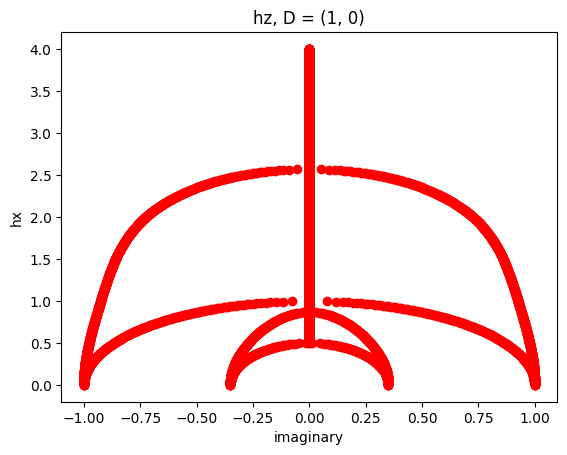

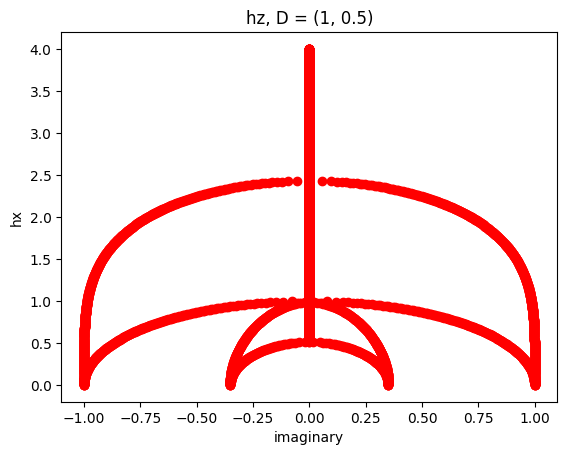

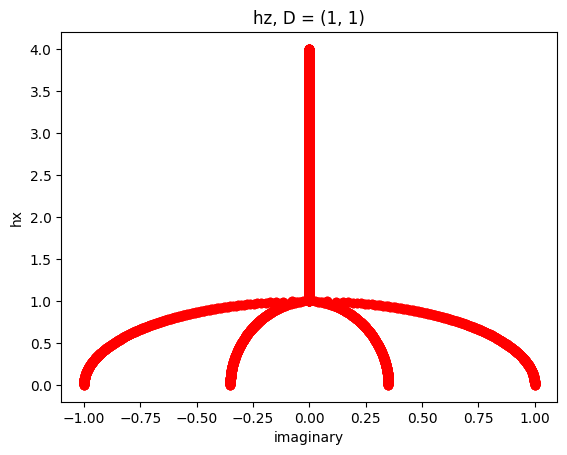

In [39]:
a = [-1,-0.5,0,0.5,1]
for k in range(len(a)):
    hz = [1]*1000
    hx = np.linspace(0,4,1000,True)
    D = [a[k]]*1000
    #Dhx = []
    #hxD = []
    hx_plot = []
    D_plot = []
    lmbda_real = []
    lmbda_im = []
    for i in range(len(hx)):
        j = 8
        while j!=0:
            #Dhx.append(D[i]/hx[i])
            #hxD.append(hx[i]*D[i])
            hx_plot.append(hx[i])
            D_plot.append(D[i])
            j-=1  
    #print(np.shape(hzhx))
        H_c = 1j*hz[i]*sz2 + hx[i]*sx2
        H_ab = sx_ab + sy_ab + D[i]*sz_ab
        H_bc = sx_bc + sy_bc + D[i]*sz_bc
        H_ac = sx_ac + sy_ac + D[i]*sz_ac
        H_t = H_c + H_ab + H_bc + H_ac
        lmbda = np.linalg.eigvals(H_t)
        for k in range(len(lmbda)):
            lmbda_real.append(lmbda.real[k])
            lmbda_im.append(lmbda.imag[k])
            np.shape(lmbda.real)
    #print(np.round(hzD,4))
    fig,ax = plt.subplots()
    ax.scatter(np.round(lmbda_im,5),hx_plot,color='r')
    ax.set_xlabel('imaginary')
    ax.set_ylabel('hx')
    plt.title('hz, D = ({}, {})'.format(hz[k],D[k]))
    #plt.xlim(-0.1,0.1)
    #plt.ylim(-0.06,0.052)
    #ax2 = ax.twinx()
    #ax2.scatter(np.round(lmbda_im,5),D_plot,s=5,color='b',marker='o')
    #ax2.set_ylabel('D')
    #plt.ylim(-1,1.5)
    plt.show()